In [1]:
# import dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import csv

In [52]:
# create file path
path_1 = os.path.join("Resources", "enter_2012.csv")
df = pd.DataFrame(pd.read_csv(path_1))
df.head()


,GEO.id,GEO.id2,GEO.display-label,NAICS.id,NAICS.display-label,SEX.id,SEX.display-label,ETH_GROUP.id,ETH_GROUP.display-label,RACE_GROUP.id,...,FIRMNOPD,RCPNOPD,FIRMALL_S,RCPALL_S,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,PAYANN_S,FIRMNOPD_S,RCPNOPD_S
0,Geographic identifier code,Id2,Geographic area name,2012 NAICS code,Meaning of 2012 NAICS code,Gender code,Meaning of Gender code,Ethnicity code,Meaning of Ethnicity code,Race code,...,Number of firms without paid employees,"Sales, receipts, or value of shipments of firm...",Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or...",Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or...",Relative standard error of number of paid empl...,Relative standard error of annual payroll (%),Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or..."
1,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,00,...,306704,12689088,0.2,0.7,0.3,0.7,1.2,0.8,0.2,1.5
2,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,30,...,223716,10610757,0.4,1.9,0.6,2.0,2.5,1.8,0.4,2.3
3,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,40,...,71109,1131644,0.6,5.8,5.7,7.9,9.9,13.0,0.6,7.0
4,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,50,...,3427,91896,7.7,44.1,16.7,49.6,14.2,18.0,8.0,8.4


In [53]:
#delete the first row in the dataframe 
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(0)).reset_index(drop=True)
df.columns.name = None

In [54]:
#rename the columns and pick out data we need 
data = df.rename(columns = {"Geographic area name":"State","Meaning of 2012 NAICS code":"Sector", 
                        "Meaning of Gender code":"Gender owned", "Meaning of Race code": "Race",
                         "Number of firms with or without paid employees":"Number of Firms",
                         "Sales, receipts, or value of shipments of firms with or without paid employees ($1,000)":"Total Firm Sales",
                         "Number of firms with paid employees":"Paid Emp Firms", "Sales, receipts, or value of shipments of firms with paid employees ($1,000)":"Paid Emp Sales",
                         "Annual payroll ($1,000)":"Annual Payroll", "Number of firms without paid employees":"Unpaid Emp Firms",
                         "Sales, receipts, or value of shipments of firms without paid employees ($1,000)": "Unpaid Emp Sales"
                        })
#list the columns we need for analysis 
cols = [2,4,6,10,12,13,14,15,17,18,19]
new_data = data[data.columns[cols]]
new_data.head()

,State,Sector,Gender owned,Race,Number of Firms,Total Firm Sales,Paid Emp Firms,Paid Emp Sales,Annual Payroll,Unpaid Emp Firms,Unpaid Emp Sales
0,Alabama,Total for all sectors,All firms,All firms,374153,410217329,67449,397528241,57623419,306704,12689088
1,Alabama,Total for all sectors,All firms,White,279625,150946701,55909,140335944,25480546,223716,10610757
2,Alabama,Total for all sectors,All firms,Black or African American,73015,3087663,1907,1956020,436107,71109,1131644
3,Alabama,Total for all sectors,All firms,American Indian and Alaska Native,3895,1291808,468,1199912,169299,3427,91896
4,Alabama,Total for all sectors,All firms,Asian,9353,4617052,3431,4305282,769114,5922,311771


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Number of Firms')

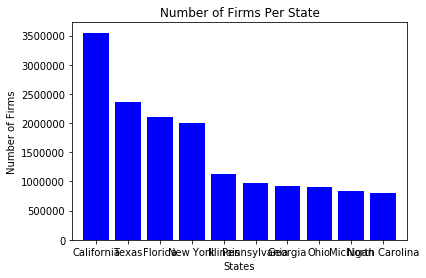

In [81]:
# make all values in the Number of firms Column integers
new_data['Number of Firms'] = new_data['Number of Firms'].astype(int)
#groupby state and maximum number of firms to extract total firms in each state
state_firms = new_data.groupby('State').agg({'Number of Firms':'max'})
#sort values in ascending order to get the 10 highest states
state_firms = state_firms.sort_values("Number of Firms", ascending=False)
#select the top 10 states 
state_firms = state_firms.head(10)
# reset index of the data frame
state_firms.reset_index(inplace=True)
# add all values to a list to plot bar chart
state_firms_x = state_firms["State"].tolist()
state_firms_y = state_firms["Number of Firms"].tolist()
#plot the bar chart for the 10 cities

plt.bar(state_firms_x, state_firms_y, color="b", align="center")

plt.title("Number of Firms Per State")
plt.xlabel("States")
plt.ylabel("Number of Firms")